<a href="https://colab.research.google.com/github/Snehaannazac/colab-git-demo-sanna/blob/main/Assignment%208%20Supervised%20Learning%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Dataset Selection and Preprocessing:
Choose a publicly available dataset suitable for a regression problem. Examples include, but are not limited to, datasets from Kaggle , UCI Machine Learning Repository,  or Google Dataset Search.
Conduct necessary preprocessing steps such as:
Cleaning data by handling missing values and removing duplicates
Converting categorical data using encoding techniques
Splitting the dataset into training and testing sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = load_breast_cancer(as_frame=True)
df = data.frame

# Inspect first rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling (optional but recommended for some models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

2.Exploratory Data Analysis (EDA):
Perform an exploratory data analysis to visualize and summarize the data. This should include:
Distribution of classes
Correlation between features
Any insights into the data that may affect the choice of classifier or the classification accuracy

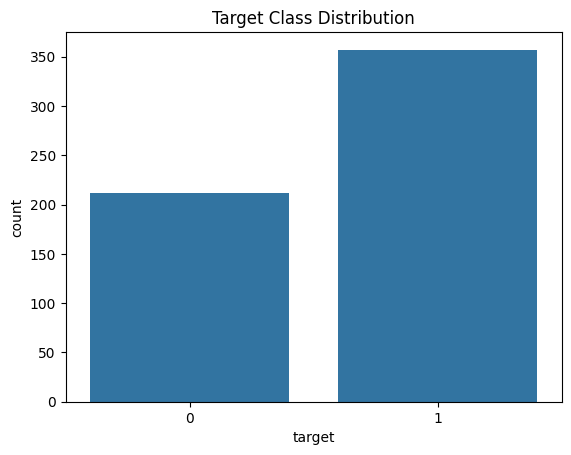

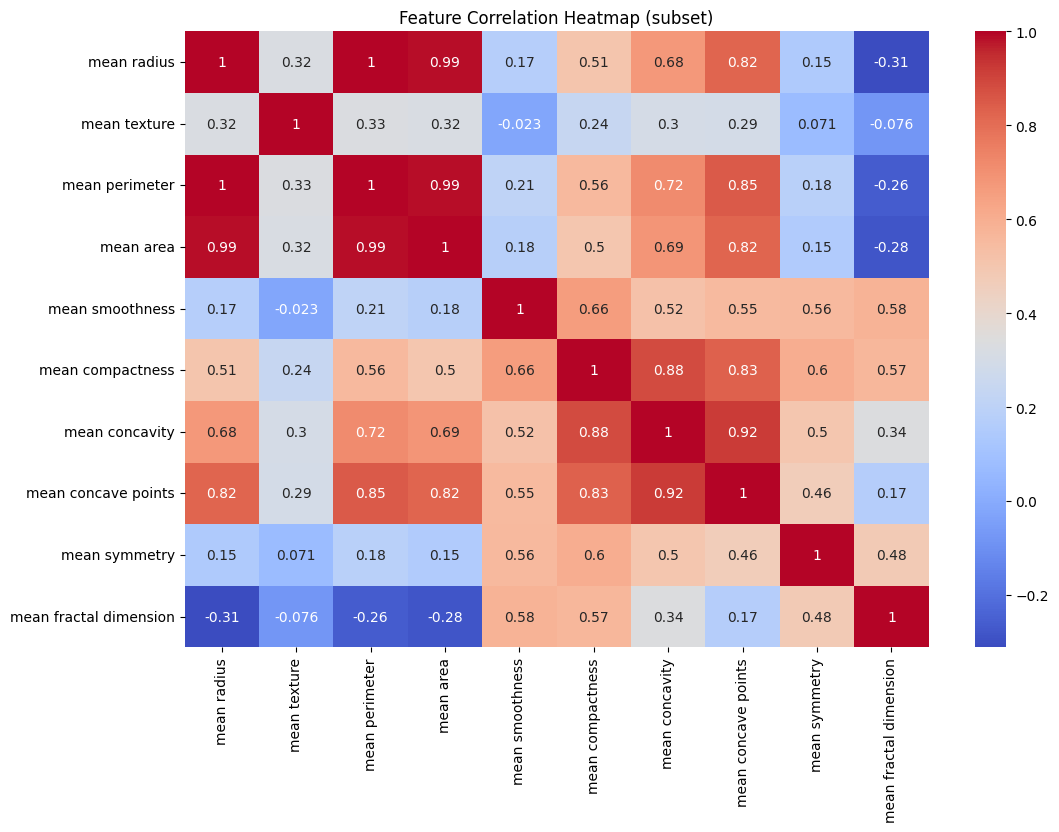

In [4]:
# Class distribution
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.show()

# Correlation heatmap (subset for readability)
plt.figure(figsize=(12,8))
sns.heatmap(X.corr().iloc[:10, :10], annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap (subset)")
plt.show()


3.Model Implementation and Evaluation:
Implement at least two classification models (e.g., Logistic Regression, Support Vector Machines, Decision Trees, Random Forests, k-Nearest Neighbors).
Train the models on the training data.
Evaluate the models on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
4.Model Interpretation and Inference:
Provide a detailed interpretation of the model results. Discuss which model performed best and why based on the metrics.
Visualize the results using confusion matrices, ROC curves, or other relevant plots.

5.Deployment and Monitoring:
Propose a method for deploying the best-performing model into a production environment.
Discuss potential issues that could arise during deployment and operation, including how to handle incoming real-time data.
Suggest strategies for ongoing monitoring and maintenance of the model.



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



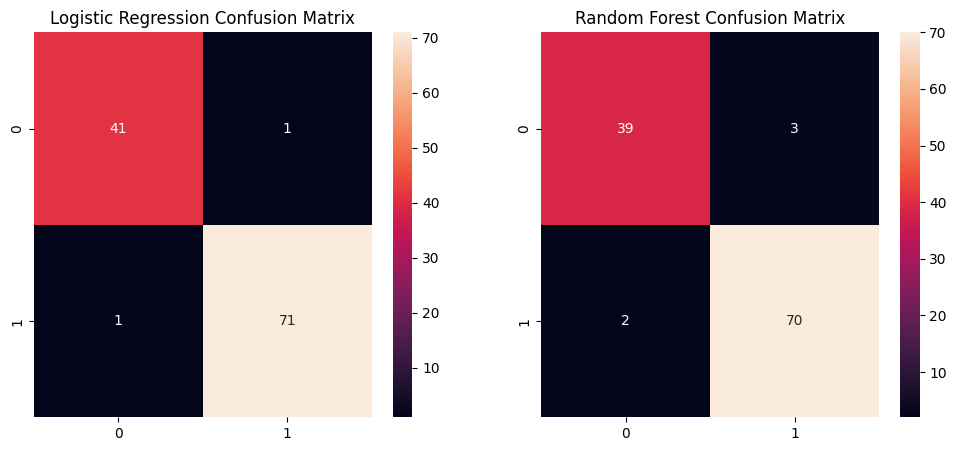

Logistic Regression ROC AUC: 0.9953703703703703
Random Forest ROC AUC: 0.9937169312169312


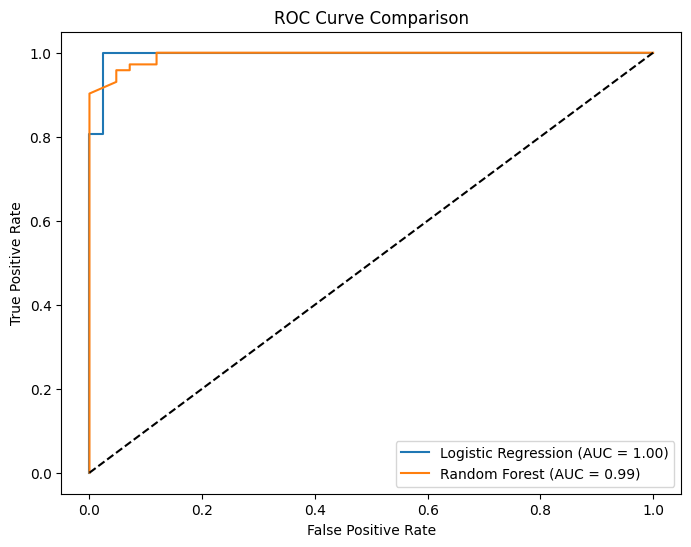

In [3]:
# Initialize models
logreg = LogisticRegression(random_state=42, max_iter=1000)
rf = RandomForestClassifier(random_state=42)

# Train models
logreg.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)  # RF handles scaling internally

# Predictions
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)

# Evaluation reports
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
plt.show()

# ROC-AUC Scores and Curves
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:,1]
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("Logistic Regression ROC AUC:", roc_auc_score(y_test, y_proba_logreg))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_proba_rf))

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_logreg, tpr_logreg, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_logreg)))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_rf)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
